<a href="https://colab.research.google.com/github/pragyapragati/temp/blob/master/Pokemon3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Pokemon.csv" with length 44028 bytes


In [5]:
uploaded

{'Pokemon.csv': b"#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary\n1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False\n2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False\n3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False\n3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False\n4,Charmander,Fire,,309,39,52,43,60,50,65,1,False\n5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False\n6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False\n6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False\n6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False\n7,Squirtle,Water,,314,44,48,65,50,64,43,1,False\n8,Wartortle,Water,,405,59,63,80,65,80,58,1,False\n9,Blastoise,Water,,530,79,83,100,85,105,78,1,False\n9,BlastoiseMega Blastoise,Water,,630,79,103,120,135,115,78,1,False\n10,Caterpie,Bug,,195,45,30,35,20,20,45,1,False\n11,Metapod,Bug,,205,50,20,55,25,25,30,1,False\n12,Butterfree,Bug,Flying,395,60,4

In [0]:
import io

In [7]:
Pokemon = pd.read_csv(io.StringIO(uploaded['Pokemon.csv'].decode('utf-8')))
print(Pokemon)

       #                       Name    Type 1  Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass  Poison    318   45      49   
1      2                    Ivysaur     Grass  Poison    405   60      62   
2      3                   Venusaur     Grass  Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass  Poison    625   80     100   
4      4                 Charmander      Fire     NaN    309   39      52   
5      5                 Charmeleon      Fire     NaN    405   58      64   
6      6                  Charizard      Fire  Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire  Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire  Flying    634   78     104   
9      7                   Squirtle     Water     NaN    314   44      48   
10     8                  Wartortle     Water     NaN    405   59      63   
11     9                  Blastoise     Water     NaN    530   79      83   

In [11]:
!pip install plotnine

    100% |████████████████████████████████| 3.6MB 10.4MB/s 
    100% |████████████████████████████████| 8.9MB 5.3MB/s 
    100% |████████████████████████████████| 61kB 22.3MB/s 
    100% |████████████████████████████████| 81kB 32.0MB/s 
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.1 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
  [pandas]
You must restart the runtime in order to use newly installed versions.


In [12]:
import numpy as np
import pandas as pd
import plotnine as pn #To avoid universal import
data = pd.read_csv("Pokemon.csv", index_col=0)
data.Generation = data.Generation.astype("object")
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


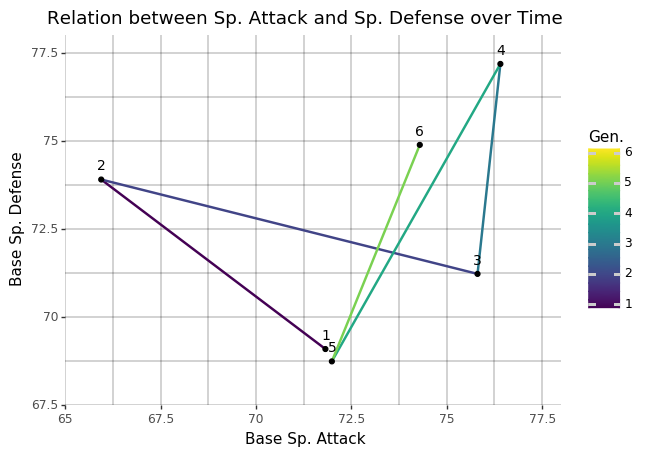

<ggplot: (8782998643169)>

In [14]:
dataHold = data.groupby(["Generation"]).mean().reset_index()
(pn.ggplot(dataHold)
 + pn.aes(x="Sp. Atk", y="Sp. Def", color="Generation", label="Generation")
 + pn.geom_path(size=1)
 + pn.geom_point(color="black")
 + pn.geom_text(color="black",
                size=10,
                nudge_y=0.4
               )
 + pn.scale_x_continuous(limits=(65, 78),
                         breaks=np.arange(65, 78, 2.5),
                         expand=(0, 0)
                        )
 + pn.scale_y_continuous(limits=(67.5, 78),
                         breaks=np.arange(67.5, 78, 2.5),
                         expand=(0, 0)
                        )
 + pn.theme(panel_background=pn.element_rect(fill="white"),
            panel_grid=pn.element_line(size=0.25,
                                       color="black"
                                      )
           )
 + pn.labs(x="Base Sp. Attack",
           y="Base Sp. Defense",
           color="Gen."
          )
 + pn.ggtitle("Relation between Sp. Attack and Sp. Defense over Time")
)

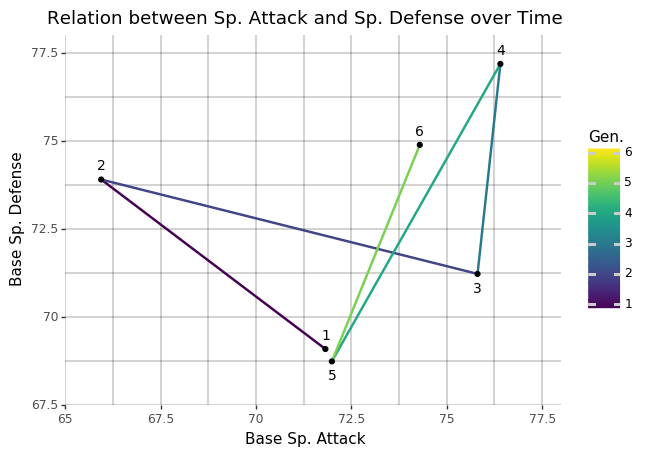

<ggplot: (-9223363253861118709)>

In [15]:
dataHold = data.groupby(["Generation"]).mean().reset_index()
dataHold = data.groupby(["Generation"]).mean().reset_index()
(pn.ggplot(dataHold)
 + pn.aes(x="Sp. Atk", y="Sp. Def", color="Generation", label="Generation")
 + pn.geom_path(size=1)
 + pn.geom_point(color="black")
 + pn.geom_text(data=dataHold.iloc[[0, 1, 3, 5], :],
                color="black",
                size=10,
                nudge_y=0.4
               )
  + pn.geom_text(data=dataHold.iloc[[2, 4], :],
                color="black",
                size=10,
                nudge_y=-0.4
               )
 + pn.scale_x_continuous(limits=(65, 78),
                         breaks=np.arange(65, 78, 2.5),
                         expand=(0, 0)
                        )
 + pn.scale_y_continuous(limits=(67.5, 78),
                         breaks=np.arange(67.5, 78, 2.5),
                         expand=(0, 0)
                        )
 + pn.theme(panel_background=pn.element_rect(fill="white"),
            panel_grid=pn.element_line(size=0.25,
                                       color="black"
                                      )
           )
 + pn.labs(x="Base Sp. Attack",
           y="Base Sp. Defense",
           color="Gen."
          )
 + pn.ggtitle("Relation between Sp. Attack and Sp. Defense over Time")
)

In [16]:
"""
Data copied from the ggplot2 documentation (https://ggplot2.tidyverse.org/reference/geom_spoke.html)
The pokemon data isn't ideal for this, so lets create a dataframe!
"""
dataHold = pd.DataFrame({"angle": np.random.uniform(0, 2 * np.pi, 121),
                         "speed": np.random.uniform(0, 0.5, size=121)},
                        index=pd.MultiIndex.from_product([range(11), range(11)], names=["X", "Y"])
                       ).reset_index()
dataHold.head()

,X,Y,angle,speed
0,0,0,4.833444,0.118653
1,0,1,5.184386,0.134223
2,0,2,5.121768,0.053487
3,0,3,0.001757,0.140527
4,0,4,4.061347,0.174581


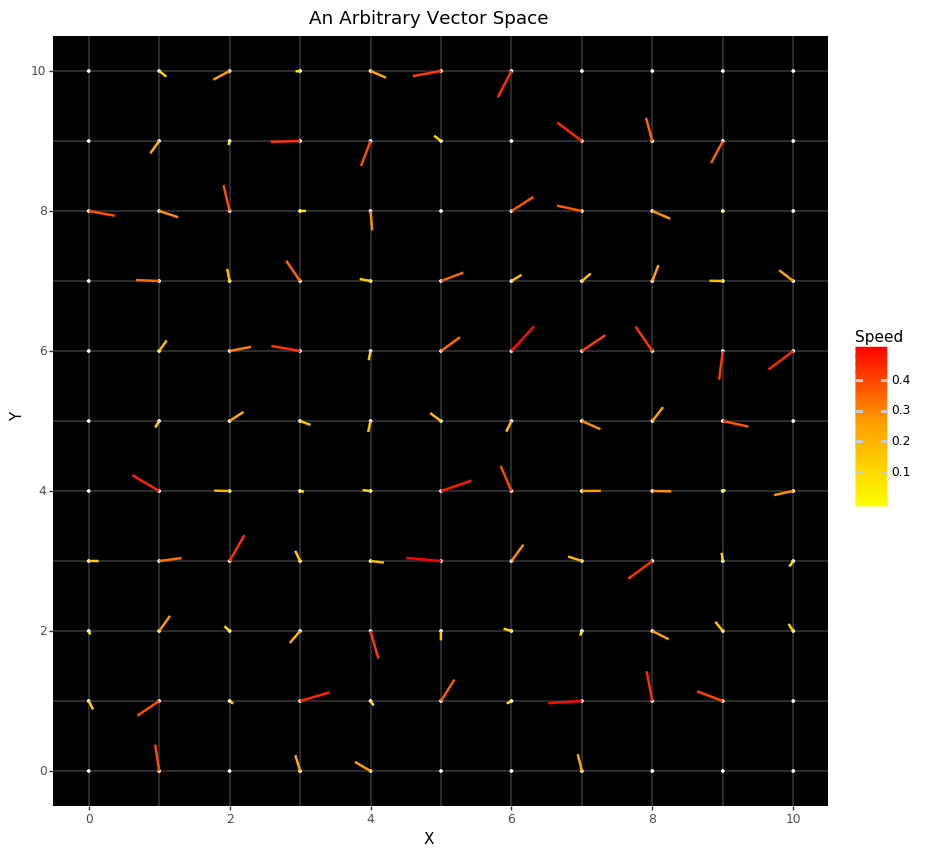

<ggplot: (8782993643847)>

In [18]:
(pn.ggplot(dataHold)
 + pn.aes(x="X", y="Y", angle="angle", radius="speed")
 + pn.geom_point(size=0.5,
                 color="white"
                )
 + pn.geom_spoke(pn.aes(color="speed"), 
                 size=1
                )
 + pn.scale_x_continuous(limits=(0, 10),
                         breaks=np.arange(0, 11, 2),
                         expand=(0, 0.5)
                        )
 + pn.scale_y_continuous(limits=(0, 10),
                         breaks=np.arange(0, 11, 2),
                         expand=(0, 0.5)
                        )
 + pn.theme(panel_background=pn.element_rect(fill="black"),
            panel_grid=pn.element_line(size=0.25,
                                       color="white"
                                      ),
            figure_size=(10, 10)
           ) 
 +pn.labs(color="Speed")
 + pn.scale_color_gradient2(low="yellow", mid="orange", high="red", midpoint=0.25)
 + pn.ggtitle("An Arbitrary Vector Space")
)


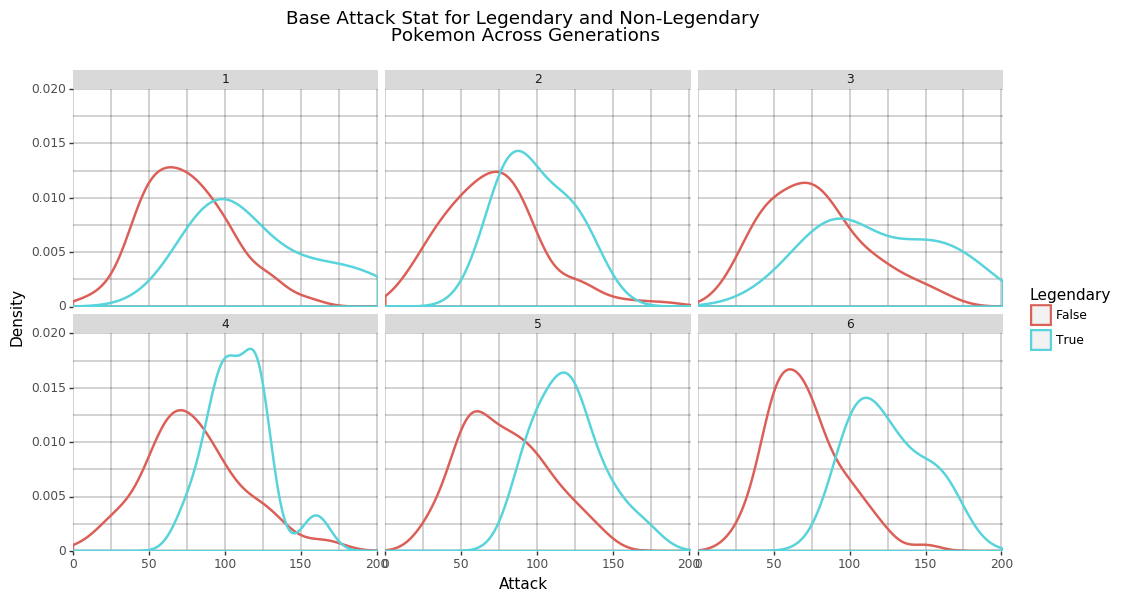

<ggplot: (8782993566819)>

In [19]:
(pn.ggplot(data)
 + pn.aes(x="Attack", color="Legendary")
 + pn.geom_density(size=1, 
                   trim=False
                  )
 + pn.facet_wrap("~ Generation")
 + pn.scale_x_continuous(limits=(0, 201),
                         breaks=np.arange(0, 201, 50),
                         expand=(0, 0)
                        )
 + pn.scale_y_continuous(limits=(0, 0.02),
                         breaks=np.arange(0, 0.021, 0.005),
                         expand=(0, 0)
                        )
 + pn.theme(panel_background=pn.element_rect(fill="white"),
            panel_grid=pn.element_line(size=0.25,
                                       color="black"
                                      ),
            figure_size=(12, 6)
           )  
 + pn.labs(y="Density")
 + pn.ggtitle("Base Attack Stat for Legendary and Non-Legendary\n Pokemon Across Generations\n")
)

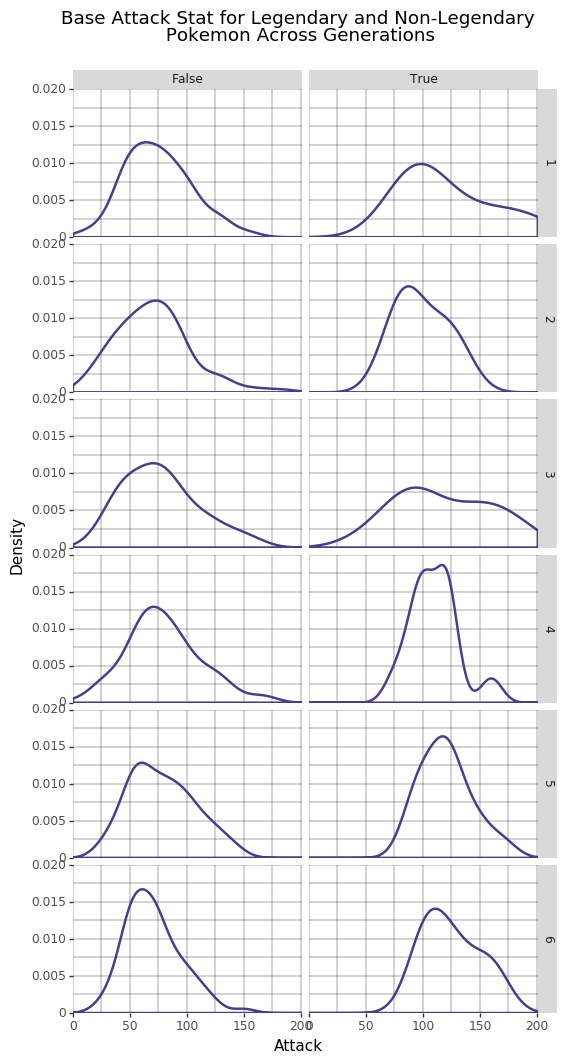

<ggplot: (8782993367844)>

In [20]:
(pn.ggplot(data)
 + pn.aes(x="Attack")
 + pn.geom_density(size=1, 
                   trim=False,
                   color="darkslateblue"
                  )
 + pn.facet_grid("Generation ~ Legendary")
 + pn.scale_x_continuous(limits=(0, 201),
                         breaks=np.arange(0, 201, 50),
                         expand=(0, 0)
                        )
 + pn.scale_y_continuous(limits=(0, 0.02),
                         breaks=np.arange(0, 0.021, 0.005),
                         expand=(0, 0)
                        )
 + pn.theme(panel_background=pn.element_rect(fill="white"),
            panel_grid=pn.element_line(size=0.25,
                                       color="black"
                                      ),
            figure_size=(6, 12)
           )  
 + pn.labs(y="Density")
 + pn.ggtitle("Base Attack Stat for Legendary and Non-Legendary\n Pokemon Across Generations\n")
)

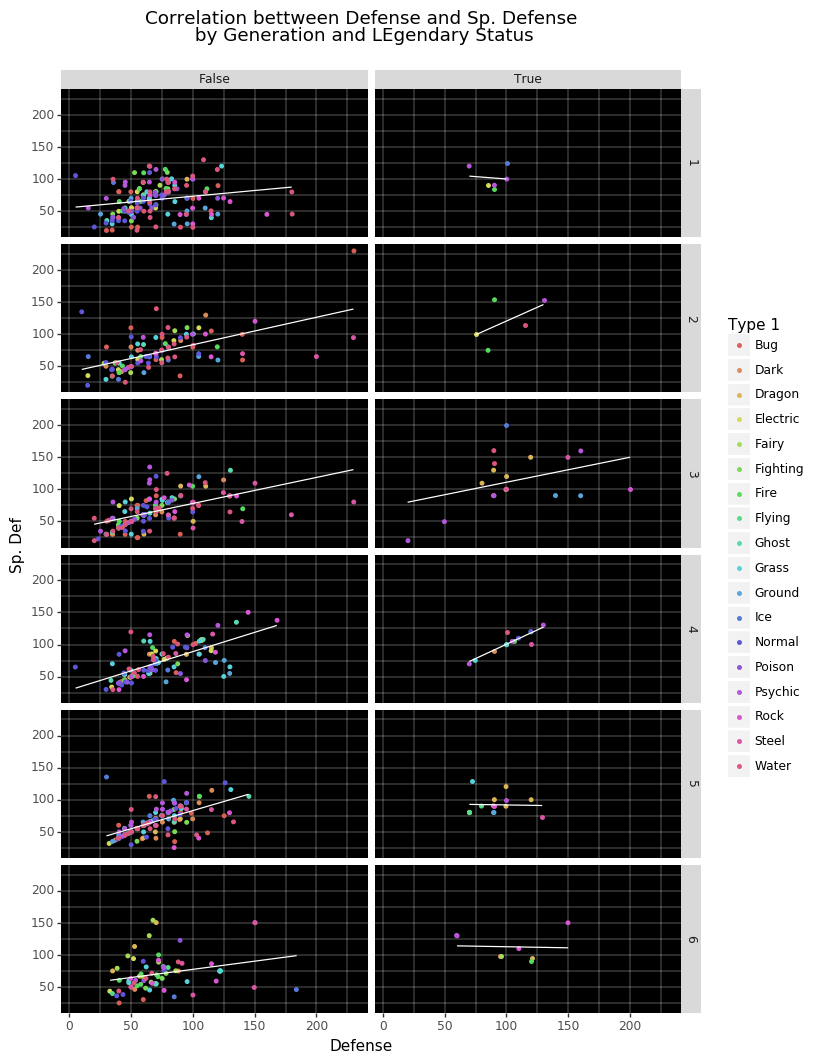

<ggplot: (8782993084399)>

In [21]:
(pn.ggplot(data)
 + pn.aes(x="Defense", y="Sp. Def")
 + pn.geom_jitter(pn.aes(color="Type 1"),
                  size=1
                 )
 + pn.geom_smooth(size=0.5,
                  color="white",
                  method="lm",
                  fullrange=False,
                  se=False
                 )
 + pn.facet_grid("Generation ~ Legendary")
 + pn.theme(panel_background=pn.element_rect(fill="black"),
            panel_grid=pn.element_line(size=0.25,
                                       color="white"
                                      ),
            figure_size=(8, 12)
           )  
 + pn.ggtitle("Correlation bettween Defense and Sp. Defense\n by Generation and LEgendary Status\n")
)